# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–µ—Ç–µ–∫—Ü–∏–∏ PiP (picture in picture)
1. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
2. –û–±—É—á–µ–Ω–∏–µ YoloV8
3. –í–∞–ª–∏–¥–∞—Ü–∏—è –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏
–î–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ PiP –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ—Ç–∫—Ä—ã—Ç—ã–π –¥–∞—Ç–∞—Å–µ—Ç COCO 2017 (train, val, test).

–ò–∑ –≤—Å–µ—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –±—É–¥—É—Ç –≤—ã–±—Ä–∞–Ω—ã –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–µ —Å —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ–º —Å—Ç–æ—Ä–æ–Ω –±–ª–∏–∑–∫–∏–º –∫ 16:9.

–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –±—É–¥—É—Ç –ø–æ–¥–µ–ª–µ–Ω—ã –Ω–∞ 2 –≥—Ä—É–ø–ø—ã: 1) –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, –≤ –∫–æ—Ç–æ—Ä–æ–µ –±—É–¥–µ—Ç –≤—Å—Ç–∞–≤–ª—è—Ç—å—Å—è PiP, 2) –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –≤—Å—Ç–∞–≤–∫–∏ PiP.

–ü–æ—Å–ª–µ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –±—É–¥—É—Ç —Å–¥–µ–ª–∞–Ω—ã 3 –≥—Ä—É–ø–ø—ã: train, val, test (80, 10, 10). –§–∏–Ω–∞–ª—å–Ω–æ–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –±—É–¥–µ—Ç –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö —Å PiP –≤ Rutube.

In [ ]:
# pip install pandas tqdm matplotlib imagesize ultralytics albumentations

In [1]:
import glob
import os

import cv2
import imagesize
import pandas as pd
from tqdm import tqdm

In [2]:
# –ø–µ—Ä–µ—Ö–æ–¥–∏–º –≤ –ø—Ä–µ–¥—ã–¥—É—â—É—é –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏
os.chdir('../')

In [3]:
images = glob.glob('data/pip/train2017/**') + glob.glob('data/pip/test2017/**') + glob.glob('data/pip/val2017/**')

In [4]:
len(images)

163957

In [5]:
data = []
for filename in tqdm(images):
    width, height = imagesize.get(filename)
    data.append({
        'image': filename,
        'height': height,
        'width': width
    })

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 163957/163957 [00:04<00:00, 37170.30it/s]


In [6]:
df_images = pd.DataFrame(data)

In [7]:
df_images['ratio'] = df_images['width'] / df_images['height']
df_filtered = df_images[(df_images['ratio'] > 1.3) & (df_images['ratio'] < 2)]
df_filtered = df_filtered[df_filtered['width'] > 600]

In [8]:
len(df_filtered)

96052

In [9]:
# –¥–µ–ª–∏–º –Ω–∞ 2 –≥—Ä—É–ø–ø—ã: –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è PiP
df_orig = df_filtered[:(len(df_filtered) // 2)]
df_insert = df_filtered[(len(df_filtered) // 2):]

In [10]:
len(df_orig), len(df_insert)

(48026, 48026)

In [11]:
# –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º
df_orig = df_orig.sample(frac=1).reset_index(drop=True)
df_insert = df_insert.sample(frac=1).reset_index(drop=True)

## –ê–ª–≥–æ—Ä–∏—Ç–º –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏
–î–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Albumentations (–∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π) –∏ cv2 –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ –≤—Å—Ç–∞–≤–∫–∏ PiP.

–ü–µ—Ä–µ–¥ –≤—Å—Ç–∞–≤–∫–æ–π –≤–∏–¥–µ–æ –±—É–¥–µ—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å—Å—è (–∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è). –ë—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è (–≤—Å–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –±—É–¥—É—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å—Å—è –ø–æ –ø–æ—Ä—è–¥–∫—É —Å —É–∫–∞–∑–∞–Ω–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é):
1. –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–µ–±–æ–ª—å—à–æ–≥–æ —Ä–∞–∑–º—ã—Ç–∏—è (p=0.5)
2. –ù–µ–±–æ–ª—å—à–æ–π –ø–æ–≤–æ—Ä–æ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –±–µ–∑ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ (p=0.5)
3. –¶–≤–µ—Ç–æ–≤–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ: –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–≤–µ—Ç–∞ (p=0.35) –∏–ª–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —á—ë—Ä–Ω–æ-–±–µ–ª–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ (p=0.65) —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é p=0.2
4. –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —á—ë—Ä–Ω–æ–≥–æ –æ—Ç—Å—Ç—É–ø–∞ –æ—Ç –∫—Ä–∞—ë–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è (p=0.5)

–ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –±—É–¥–µ—Ç –≤—Å—Ç–∞–≤–ª—è—Ç—å—Å—è –≤ —Å–ª—É—á–∞–π–Ω–æ–µ –º–µ—Å—Ç–æ, —Å —Ä–∞–∑–º–µ—Ä–æ–º –æ—Ç 0.3 –¥–æ 0.75 –æ—Ç –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –ø—Ä–∏ —ç—Ç–æ–º –æ–Ω–æ –±—É–¥–µ—Ç –≤—Å—Ç–∞–≤–ª—è—Ç—å—Å—è —Å –Ω–µ–±–æ–ª—å—à–æ–π –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å—é.

In [12]:
import random
import json

import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from albumentations.pytorch import ToTensorV2

In [13]:
def augment_image(image: np.ndarray) -> np.ndarray:
    """–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é.

    :param image: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
    :return: –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    """
    transform = A.Compose([
        A.PadIfNeeded(min_height=image.shape[0]+40, min_width=image.shape[1]+40, border_mode=cv2.BORDER_CONSTANT, value=0, p=0.5),
        A.Rotate(limit=(-20,20), border_mode=cv2.BORDER_CONSTANT, value=0, interpolation=0, p=0.5),
        A.OneOf([
            A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=0.35),
            A.ToGray(p=0.65)
        ], p=0.2),
        A.GaussianBlur(blur_limit=(3, 9), p=0.5),
    ])
    augmented = transform(image=image)
    return augmented['image']

def create_pip_image(
    base_image: np.ndarray,
    inserted_image: np.ndarray,
) -> tuple[np.ndarray, list[float]]:
    """–í—Å—Ç–∞–≤–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è PiP.

    :param base_image: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∫—É–¥–∞ –±—É–¥–µ—Ç –≤—Å—Ç–∞–≤–ª—è—Ç—å—Å—è PiP
    :param inserted_image: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –≤—Å—Ç–∞–≤–∫–∏ PiP
    :return: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å PiP –∏ –±–æ–∫—Å PiP –≤ —Ñ–æ—Ä–º–∞—Ç–µ COCO
    """
    h, w, _ = base_image.shape
    ih, iw, _ = inserted_image.shape

    # –ø–æ–¥—Å—á—ë—Ç —Ä–∞–∑–º–µ—Ä–æ–≤ –¥–ª—è –≤—Å—Ç–∞–≤–∫–∏
    max_scale = min(w / iw, h / ih) * 1.0
    scale = random.uniform(0.25, 0.8)
    resized_inserted_image = cv2.resize(inserted_image, (int(iw * scale), int(ih * scale)))

    # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    resized_inserted_image = augment_image(resized_inserted_image)

    ih, iw, _ = resized_inserted_image.shape

    # –ø–æ–∑–∏—Ü–∏—è –¥–ª—è –≤—Å—Ç–∞–≤–∫–∏
    x_min = random.randint(0, w - iw)
    y_min = random.randint(0, h - ih)

    # –≤—Å—Ç–∞–≤–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å—é —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 0.5
    if random.randint(0, 1):
        alpha = random.uniform(0.7, 0.9)
    else:
        alpha = 1.0
    overlay = base_image.copy()
    overlay[y_min:y_min+ih, x_min:x_min+iw] = resized_inserted_image

    cv2.addWeighted(overlay, alpha, base_image, 1 - alpha, 0, base_image)
   
    # –ø–æ–¥—Å—á—ë—Ç —Ü–µ–Ω—Ç—Ä–æ–≤ —Ç–æ—á–µ–∫ –±–æ–∫—Å–æ–≤
    x_center = x_min + iw / 2
    y_center = y_min + ih / 2

    # –±–æ–∫—Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è PiP –≤ COCO —Ñ–æ—Ä–º–∞—Ç–µ
    bbox = [
        x_center / w,
        y_center / h,
        iw / w,
        ih / h,
    ]

    return base_image, bbox

def display_pip_with_box(
    image: np.ndarray,
    coco_box: list[float],
) -> None:
    """–û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å PiP —Å –≤—ã–¥–µ–ª–µ–Ω–∏–µ–º –±–æ–∫—Å–∞ –ø–æ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏
    
    :param image: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å PiP
    :param icoco_box: –±–æ–∫—Å PiP –≤ —Ñ–æ—Ä–º–∞—Ç–µ COCO
    """
    image_with_bbox = image.copy()

    h, w, _ = image.shape
    
    x_center = coco_box[0] * w
    y_center = coco_box[1] * h
    box_width = coco_box[2] * w
    box_height = coco_box[3] * h
    
    x_min = int(x_center - box_width / 2)
    y_min = int(y_center - box_height / 2)
    x_max = int(x_center + box_width / 2)
    y_max = int(y_center + box_height / 2)
    
    # Draw rectangle
    cv2.rectangle(
        image_with_bbox, 
        (x_min, y_min), 
        (x_max, y_max), 
        (255, 0, 0), 2,
     )
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_bbox, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## –ü—Ä–∏–º–µ—Ä—ã –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏

/home/vladislav/anaconda3/envs/copyright/lib/python3.10/site-packages/pydantic/main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


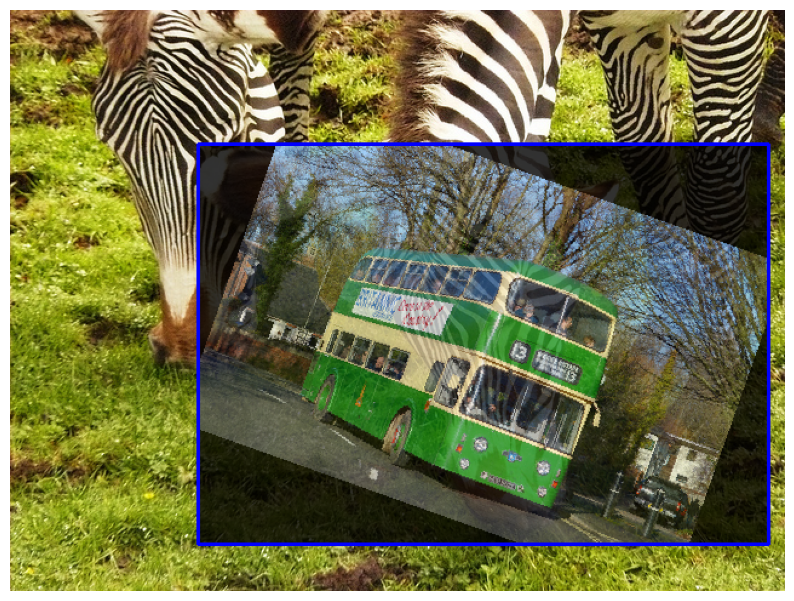

In [14]:
orig_image = cv2.imread(df_orig.iloc[0].image)
insert_image = cv2.imread(df_insert.iloc[0].image)

pip_image, pip_box = create_pip_image(orig_image, insert_image)
display_pip_with_box(pip_image, pip_box)

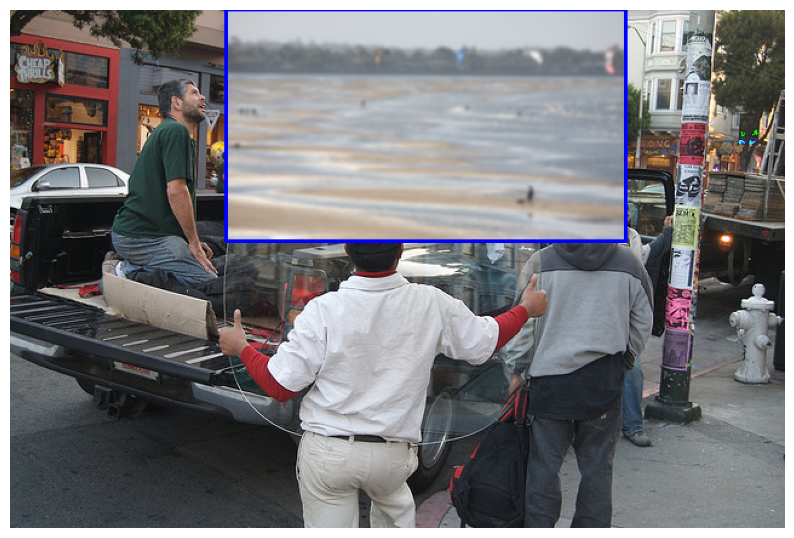

In [15]:
orig_image = cv2.imread(df_orig.iloc[1].image)
insert_image = cv2.imread(df_insert.iloc[1].image)

pip_image, pip_box = create_pip_image(orig_image, insert_image)
display_pip_with_box(pip_image, pip_box)

## –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
1. –î–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ 3 –≥—Ä—É–ø–ø—ã (train, val, test)
2. –°–æ–∑–¥–∞—ë–º –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ –≤ COCO —Ñ–æ—Ä–º–∞—Ç–µ (images/{train, val, test}), labels/{train, val, test}
3. –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, —Å–æ—Ö—Ä–∞–Ω—è–µ–º –º–µ—Ç–∞–¥–∞–Ω–Ω—ã–µ
4. –í–∞–ª–∏–¥–∏—Ä—É–µ–º —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è

In [16]:
import os
import uuid

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤

In [17]:
# –¥–∞—Ç–∞—Å–µ—Ç —Å –ø–æ–ª—è–º–∏ orig_image, insert_image 
df_orig_craft = df_orig.rename(columns={'image': 'orig_image'})[['orig_image']].reset_index(drop=True)
df_insert_craft = df_insert.rename(columns={'image': 'insert_image'})[['insert_image']].reset_index(drop=True)
df_craft = df_orig_craft.join(df_insert_craft).sample(frac=1).reset_index(drop=True)

In [18]:
len(df_craft)

48026

In [19]:
train_size = int(len(df_craft) * 0.8)
df_craft_train = df_craft[:train_size]

df_craft_val_test = df_craft[train_size:]
val_size = len(df_craft_val_test) // 2

df_craft_val = df_craft_val_test[:val_size]
df_craft_test = df_craft_val_test[val_size:]

In [20]:
len(df_craft_train), len(df_craft_val), len(df_craft_test)

(38420, 4803, 4803)

In [21]:
DATA_DIR = 'data/pip/crafted'
os.makedirs(DATA_DIR)

df_craft_train.to_csv(f'{DATA_DIR}/raw_train.csv', index=False)
df_craft_val.to_csv(f'{DATA_DIR}/raw_val.csv', index=False)
df_craft_test.to_csv(f'{DATA_DIR}/raw_test.csv', index=False)

### –ü–∞–π–ø–ª–∞–π–Ω –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏

In [22]:
def craft_dataset(
    df_craft: pd.DataFrame,
    data_path: str,
    dataset_type: str,
) -> None:
    """–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏ PiP.

    —Å–æ–∑–¥–∞—ë—Ç –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ –≤ —Ñ–æ—Ä–º–∞—Ç–µ PiP –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –º–µ—Ç–∞-–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π.
    —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 0.5 –≤—Å—Ç–∞–≤—è–ª–µ—Ç –∏–∑–æ—é—Ä–∞–∂–µ–Ω–∏–µ PiP
    
    :param df_craft: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ø–æ–ª—è–º–∏ 'orig_image' 'insert_image'
    :param data_path: –ø—É—Ç—å –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ 'path/to/dataset'
    :param dataset_type: train, test, val
    """
    dataset = []
    bad_images = 0
    images_dir = f'{data_path}/images/{dataset_type}'
    labels_dir = f'{data_path}/labels/{dataset_type}'

    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    for _, row in tqdm(df_craft.iterrows(), total=len(df_craft)):
        # —É–Ω–∏–∫–∞–ª—å–Ω—ã–π ID –¥–ª—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏
        file_uuid = str(uuid.uuid4())
        img_path = f'{images_dir}/{file_uuid}.png'
        label_path = f'{labels_dir}/{file_uuid}.txt'
        
        # –º–µ—Ç–∫–∞ –Ω–∞–ª–∏—á–∏—è PiP, –µ—Å–ª–∏ True, —Ç–æ –≤—Å—Ç–∞–≤–ª—è—Ç—Å—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏ –ø–∏—à–µ—Ç—Å—è –±–æ–∫—Å –≤ –∞–Ω–Ω–æ—Ç–∞—Ü–∏—é 
        make_pip = bool(random.randint(0, 1))

        orig_image = cv2.imread(row.orig_image)

        # –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –±–µ–∑ PiP
        if not make_pip:
            img_class = 'orig' 
            # –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
            aug_image = augment_image(orig_image)
            cv2.imwrite(img_path, aug_image)

            # —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ø—É—Å—Ç–æ–π –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏
            with open(label_path, 'w') as fout:
                print('', file=fout)
        # –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å PiP
        else:
            img_class = 'pip' 
            insert_image = cv2.imread(row.insert_image)

            # –≤ —Å–ª—É—á–∞–µ –µ—Å–ª–∏ –Ω–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –≤—Å—Ç–∞–≤–∏—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ -- –ø—Ä–æ–ø—É—Å–∫–∞–µ–º –ø–∞—Ä—É
            try:
                pip_image, pip_box = create_pip_image(orig_image, insert_image)

                # –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤—Å—Ç–∞–≤–∏–ª–æ—Å—å –±–µ–∑ –æ—à–∏–±–æ–∫
                cv2.imwrite(img_path, pip_image)
                # —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏ –≤ —Ñ–æ—Ä–º–∞—Ç–µ COCO: class box
                with open(label_path, 'w') as fout:
                    print('0 ' + str(pip_box).replace(',', '')[1:-1], file=fout)
            except:
                bad_images += 1
                continue
        dataset.append(
            {
                'image': img_path,
                'label': label_path,
                'class': img_class
            }
        )
    df = pd.DataFrame(dataset)
    df_path = f'{data_path}/{dataset_type}.csv'
    df.to_csv(df_path)
    
    print(f'–î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤: {df_path}')
    print(f'–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç {len(df)} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π')
    print(f'–∏–∑ –Ω–∏—Ö {len(df[df["class"] == "pip"])} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å PiP')
    
    print(f'–ü—Ä–∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –ø—Ä–æ–ø—É—â–µ–Ω–æ {bad_imaes} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π')

### –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

In [23]:
# train
craft_dataset(
    df_craft_train,
    'data/pip/crafted',
    'train',
)

  0%|          | 0/38420 [00:00<?, ?it/s]/home/vladislav/anaconda3/envs/copyright/lib/python3.10/site-packages/pydantic/main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38420/38420 [12:00<00:00, 53.32it/s]


–î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤: data/pip/crafted/train.csv
–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç 38317 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–∏–∑ –Ω–∏—Ö 18963 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å PiP
–ü—Ä–∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –ø—Ä–æ–ø—É—â–µ–Ω–æ 103 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π


In [24]:
# valid
craft_dataset(
    df_craft_val,
    'data/pip/crafted',
    'val',
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4803/4803 [01:32<00:00, 51.92it/s]

–î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤: data/pip/crafted/val.csv
–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç 4793 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–∏–∑ –Ω–∏—Ö 2393 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å PiP
–ü—Ä–∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –ø—Ä–æ–ø—É—â–µ–Ω–æ 10 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π


In [25]:
# test
craft_dataset(
    df_craft_test,
    'data/pip/crafted',
    'test',
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4803/4803 [01:34<00:00, 51.04it/s]

–î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤: data/pip/crafted/test.csv
–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç 4790 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
–∏–∑ –Ω–∏—Ö 2402 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å PiP
–ü—Ä–∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –ø—Ä–æ–ø—É—â–µ–Ω–æ 13 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π


## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ YoloV8 –¥–µ—Ç–µ–∫—Ü–∏–∏ PiP

In [1]:
from ultralytics import YOLO

# –∑–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏
model = YOLO("yolov8n.pt")  # –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å

In [3]:
# –∏–∑–º–µ–Ω–∏—Ç—å –ø—É—Ç—å –∫ –¥–∞—Ç–∞—Å–µ—Ç—É –≤ –∫–æ–Ω—Ñ–∏–µ .config/Ultralitics/config.yaml
model.train(data='full_path_to_dataset', epochs=30, batch=32)

# —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏–ª–æ 30 —ç–ø–æ—Ö

Ultralytics YOLOv8.2.32 üöÄ Python-3.10.14 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7974MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/vladislav/ml/compet/copchecker/data/pip/crafted/coco_dataset.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

train: Scanning /home/vladislav/ml/compet/copchecker/data/pip/crafted/labels/train.cache... 38317 images, 19354 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38317/38317 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/vladislav/ml/compet/copchecker/data/pip/crafted/labels/val.cache... 4793 images, 2400 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4793/4793 [00:00<?, ?it/s]


Plotting labels to runs/detect/train18/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train18
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.61G      0.257     0.9649     0.8975         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1198/1198 [03:59<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 75/75 [00:14<00:00,  5.31it/s]


                   all       4793       2393      0.924      0.961      0.985      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.27G     0.2356     0.3534     0.8631         15        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1198/1198 [04:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 75/75 [00:13<00:00,  5.49it/s]


                   all       4793       2393      0.965      0.931      0.984      0.975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.27G     0.2624     0.3567     0.8751         17        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1198/1198 [04:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 75/75 [00:13<00:00,  5.40it/s]


                   all       4793       2393      0.684      0.894      0.883      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.27G     0.2728     0.3688     0.8809         46        640:  41%|‚ñà‚ñà‚ñà‚ñà      | 486/1198 [01:34<02:18,  5.13it/s]

KeyboardInterrupt

